<a href="https://colab.research.google.com/github/chuan1215/DLI_GroupAG/blob/main/LauYongFeng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

data_path = "/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (11430, 89)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)
print("After dropping NA:", df.shape)

# Check if there are any categorical values that need encoding
print("Data types:\n", df.dtypes)

# Identify the label column (based on your output, it's likely 'status')
if 'class' in df.columns:
    df.rename(columns={'class': 'label'}, inplace=True)
elif 'status' in df.columns:
    df.rename(columns={'status': 'label'}, inplace=True)
else:
    raise KeyError("No target label column found. Please ensure the dataset has a 'class' or 'status' column.")

# Drop non-numeric and non-informative columns like 'url'
df.drop(columns=['url'], inplace=True, errors='ignore')

# Convert label column to binary (e.g., 'phishing' = 1, 'legitimate' = 0)
df['label'] = df['label'].map({'phishing': 1, 'legitimate': 0})

After dropping NA: (11430, 89)
Data types:
 url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


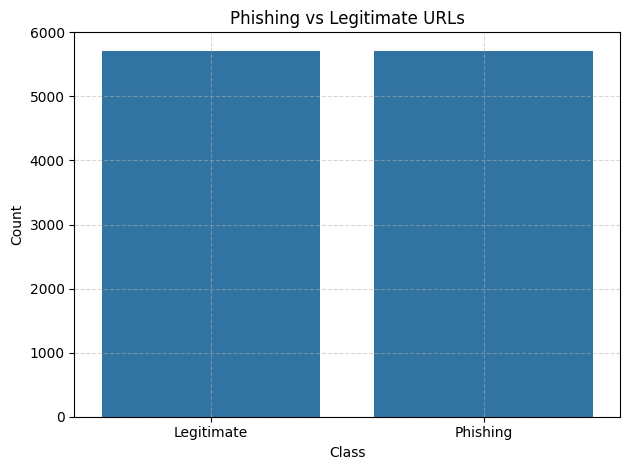

In [5]:
sns.countplot(data=df, x='label')
plt.title('Phishing vs Legitimate URLs')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Evaluation:
Accuracy: 0.9693788276465442

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286


Confusion Matrix:
 [[1129   28]
 [  42 1087]]


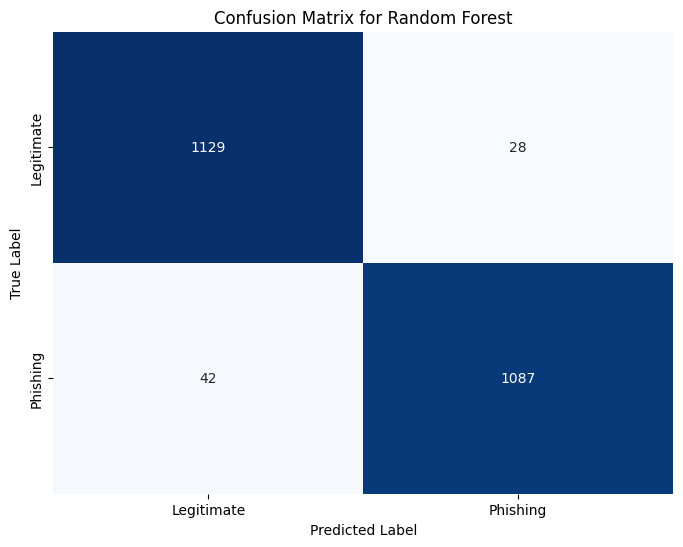

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [7]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.xticks([0.5, 1.5], ['Legitimate', 'Phishing'])
plt.yticks([0.5, 1.5], ['Legitimate', 'Phishing'])
plt.show()

# Print classification report for better readability
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

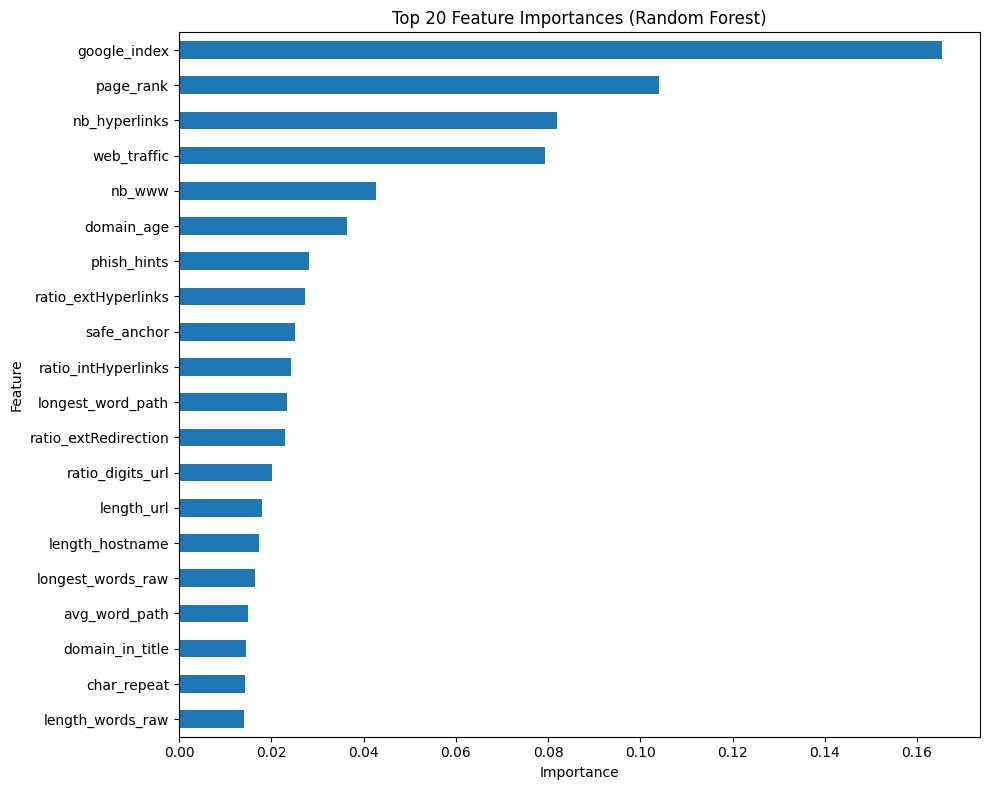

In [8]:
# Get feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Plot the top N feature importances (you can adjust N)
top_n = 20  # Display top 20 features
plt.figure(figsize=(10, 8))
sorted_feature_importances[:top_n].plot(kind='barh')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.tight_layout()
plt.show()